# Neural Network

[USA_house_price](https://huggingface.co/datasets/Nhule0502/USA_house_price)

In [1]:
import pandas as pd

df_house_price = pd.read_csv("hf://datasets/Nhule0502/USA_house_price/USA Housing Dataset.csv")
df_house_price.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [2]:
# prompt: write me code which remove all not numerical data columns from the df_house_price dataframe.

# Keep only numerical columns
df_house_price = df_house_price.select_dtypes(include=['number'])
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4140 non-null   float64
 1   bedrooms       4140 non-null   float64
 2   bathrooms      4140 non-null   float64
 3   sqft_living    4140 non-null   int64  
 4   sqft_lot       4140 non-null   int64  
 5   floors         4140 non-null   float64
 6   waterfront     4140 non-null   int64  
 7   view           4140 non-null   int64  
 8   condition      4140 non-null   int64  
 9   sqft_above     4140 non-null   int64  
 10  sqft_basement  4140 non-null   int64  
 11  yr_built       4140 non-null   int64  
 12  yr_renovated   4140 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 420.6 KB


In [4]:
X = df_house_price.drop('price', axis=1)
y = df_house_price['price']
X.shape, y.shape

((4140, 12), (4140,))

In [7]:
# prompt: Separate the data Train and Test dataset.
# The ratio should be 80% and 20%. The varibals names should be X_train, X_test and y_train and y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3312, 12), (828, 12), (3312,), (828,))

In [18]:
# prompt: Create a linear regression model. The mode train the X_train and y_train varrible and
# test the performance on the X_test and y_test varrible.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 65548102000.559654
R-squared: 0.37475248028186714


In [9]:
# prompt: Create a linear regression model. The mode train the X_train and y_train varrible and
# test the performance on the X_test and y_test varrible. Use the tensorflow libary to implementation.

import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded your data into X_train, X_test, y_train, y_test

# Define the linear regression model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],))  # Output layer with 1 neuron
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error as loss function

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)  # Adjust epochs as needed

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Squared Error: 273151297418.63898
R-squared: -1.6055242792130864


In [19]:
# prompt: Create a neural network model. The mode train the X_train and y_train varrible and
# test the performance on the X_test and y_test varrible. Use the tensorflow libary to implementation. Use three layer and use RELU activation funciton in the hidden layers.

# Assuming you have already loaded your data into X_train, X_test, y_train, y_test

# Define the neural network model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 2
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error as loss function

# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))  # Adjust epochs as needed

# Make predictions on the test data
y_pred_nn = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_nn)
r2 = r2_score(y_test, y_pred_nn)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error: 74695186590.64516
R-squared: 0.28750064875585146


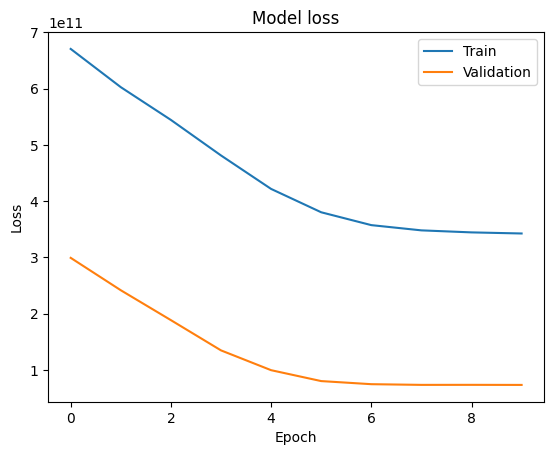

In [17]:
# prompt: Create a simple plot visualisation the training and validation loss. Use the data from history.history property.

import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'][:10])
plt.plot(history.history['val_loss'][:10])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [21]:
y_pred_lr.shape, y_pred_nn.shape, y_test.shape

((828,), (828, 1), (828,))